## PI to PD difference plots

### Div imports:

In [17]:
# load and autoreload
from IPython import get_ipython
from matplotlib import colors
from useful_scit.imps import (plt)

from sect_sens.constants import get_plotpath
from sect_sens.data_info.simulation_types import get_diff_by_type
from sect_sens.util.imports import get_averaged_fields
from sect_sens.util.practical_functions import make_folders
from sect_sens.data_info.simulation_types import get_abs_by_type
from sect_sens.util.slice_average.avg_pkg import yearly_mean_dic
import cartopy.crs as ccrs

from IPython.display import clear_output

from sect_sens.data_info.simulation_types import get_casen_by_type_mod

from sect_sens.util.slice_average.significance import calc_significance_field, hatch_area_sign

# noinspection PyBroadException
try:
    _ipython = get_ipython()
    _magic = _ipython.magic
    _magic('load_ext autoreload')
    _magic('autoreload 2')
except ImportError:
    pass

from sect_sens.util.plot.maps_PIPD import abs_diffs

### Div settings: 

In [18]:
p_level = 1013.
pmin = 850.  # minimum pressure level
avg_over_lev = True  # True#True#False#True
pressure_adjust = True  # Can only be false if avg_over_lev false. Plots particular hybrid sigma lev
p_levels = [1013., 900., 800., 700., 600.]  # used if not avg

In [19]:
model = 'NorESM'

startyear = '0004-01'
endyear = '0008-12'

cases_sec = [
    'NF1850_SECT_ctrl',
    'NF1850_aeroxid2014_SECT_ctrl'
]
cases_orig = [
    'NF1850_noSECT_def',
    'NF1850_aeroxid2014_noSECT_def',
    'NF1850_aeroxid2014_noSECT_ox_ricc',
    'NF1850_noSECT_ox_ricc'
]

cases = cases_orig + cases_sec

### For output names:

In [20]:
version = 'pi_pd_diff'
plot_path = get_plotpath('maps')
filen_base = plot_path + '/%s' % version
# print(plot_path)
make_folders(plot_path)

In [21]:
print(filen_base)

/home/ubuntu/mnts/nird/projects//Plots_SECT_SENS/maps//pi_pd_diff


### Variables to load

In [22]:
varl = ['NCONC01', 'NMR01', 'N_AER', 'NCONC08', 'NCONC09', 'NMR08', 'NMR09', 'ACTNL_incld', 'ACTREL_incld', 'CDNUMC',
        'cb_NA',
        'cb_SOA_NA', 'cb_SO4_NA', 'AWNC_incld', 'AREL_incld',
        'SWCF_Ghan', 'LWCF_Ghan', 'NCFT_Ghan', 'N50', 'N100', 'N250', 'N150', 'N200', 'SIGMA01', 'NMR01', 'NCONC01']
subfig_size = 2.9
asp_ratio = .9
print(varl)

['NCONC01', 'NMR01', 'N_AER', 'NCONC08', 'NCONC09', 'NMR08', 'NMR09', 'ACTNL_incld', 'ACTREL_incld', 'CDNUMC', 'cb_NA', 'cb_SOA_NA', 'cb_SO4_NA', 'AWNC_incld', 'AREL_incld', 'SWCF_Ghan', 'LWCF_Ghan', 'NCFT_Ghan', 'N50', 'N100', 'N250', 'N150', 'N200', 'SIGMA01', 'NMR01', 'NCONC01']


## Load data from file: 
The following algortithm computes and loades map averages. 

In [23]:

case_dic = get_averaged_fields.get_maps_cases(cases,
                                              varl,
                                              startyear,
                                              endyear,
                                              avg_over_lev=avg_over_lev,
                                              pmin=pmin,
                                              pressure_adjust=pressure_adjust,
                                              p_level=p_level,
                                              )

Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//means/map_means//NorESM/NF1850_noSECT_def/NCONC01_0004-01-0008-12_avg2lev850.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//means/map_means//NorESM/NF1850_noSECT_def/NMR01_0004-01-0008-12_avg2lev850.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//means/map_means//NorESM/NF1850_noSECT_def/N_AER_0004-01-0008-12_avg2lev850.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//means/map_means//NorESM/NF1850_noSECT_def/NCONC08_0004-01-0008-12_avg2lev850.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//means/map_means//NorESM/NF1850_noSECT_def/NCONC09_0004-01-0008-12_avg2lev850.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//means/map_means//NorESM/NF1850_noSECT_def/NMR08_0004-01-0008-12_avg2lev850.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//means/map_means//NorESM/NF1850_noSECT_def/N

## Calculate various variables:

In [24]:
for case in cases:
    _ds = case_dic[case]
    _ds['NPF_frac'] = _ds['NCONC01'] / _ds['N_AER'] * 100
    _ds['NPF_frac'].attrs['units'] = '%'
if 'NPF_frac' not in varl:
    varl.append('NPF_frac')

### Get difference from PI to PD

In [25]:
relative = False
dic_diff = get_diff_by_type(case_dic, varl, ctrl='PI', case_types=['PI', 'PIaerPD'],
                            # mod_types=['OsloAeroSec','OsloAero$_{def}$'],
                            relative=relative)

dic_diff.keys()
di_dic = dic_diff['PIaerPD-PI']
di_dic.keys()

['PI', 'PIaerPD'] ['OsloAeroSec', 'OsloAero$_{imp}$', 'OsloAero$_{def}$']
subtracting NF1850_SECT_ctrl-NF1850_SECT_ctrl
subtracting NF1850_noSECT_ox_ricc-NF1850_noSECT_ox_ricc
subtracting NF1850_noSECT_def-NF1850_noSECT_def
subtracting NF1850_aeroxid2014_SECT_ctrl-NF1850_SECT_ctrl
subtracting NF1850_aeroxid2014_noSECT_ox_ricc-NF1850_noSECT_ox_ricc
subtracting NF1850_aeroxid2014_noSECT_def-NF1850_noSECT_def


dict_keys(['OsloAeroSec', 'OsloAero$_{imp}$', 'OsloAero$_{def}$'])

### Organize data in easy to use format:

In [28]:
relative = False

dic_abs = get_abs_by_type(case_dic,
                          case_types=['PI', 'PD'],
                          mod_types=None)

['PI', 'PD'] ['OsloAeroSec', 'OsloAero$_{imp}$', 'OsloAero$_{def}$']


In [29]:
dic_abs.keys()

dict_keys(['PI', 'PD'])

In [30]:
dic_abs['PI'].keys()

dict_keys(['OsloAeroSec', 'OsloAero$_{imp}$', 'OsloAero$_{def}$'])

## Plots:

In [31]:
norm_dic = dict(
    SOA_LV=colors.SymLogNorm(vmin=-5e-1, vmax=5e-1, linthresh=.01, base=10, linscale=.4),
    H2SO4=colors.SymLogNorm(vmin=-5e-1, vmax=5e-1, linthresh=.01, base=10, linscale=.4),
    NCONC01=colors.SymLogNorm(vmin=-1e3, vmax=1e3, linthresh=10, base=10, linscale=.6),
    NMR01=colors.SymLogNorm(vmin=-10, vmax=10, linthresh=5, base=10),  # linscale=.5),
    AWNC_incld=colors.SymLogNorm(vmin=-50, vmax=50, linthresh=1, base=10),
    ACTNL_incld=colors.SymLogNorm(vmin=-40, vmax=40, linthresh=1, linscale=0.5, base=10),
    AREL_incld=colors.SymLogNorm(vmin=-5, vmax=5, linthresh=.1, base=10),
    ACTREL_incld=colors.SymLogNorm(vmin=-7, vmax=7, linthresh=.1, base=10, linscale=0.6),
    CDNUMC=None,
    SWCF_Ghan=colors.Normalize(vmin=-2, vmax=2),
    LWCF_Ghan=colors.Normalize(vmin=-2, vmax=2),
    NCFT_Ghan=colors.Normalize(vmin=-2, vmax=2),

)
norm_dic_rel = dict(
    SOA_LV=colors.Normalize(vmin=-50, vmax=50),
    H2SO4=colors.Normalize(vmin=-50, vmax=50),
    NCONC01=colors.Normalize(vmin=-250, vmax=250),
    NMR01=colors.Normalize(vmin=-50, vmax=50),
    AWNC_incld=colors.Normalize(vmin=-50, vmax=50),
    ACTNL_incld=colors.Normalize(vmin=-13, vmax=13),
    AREL_incld=colors.Normalize(vmin=-10, vmax=10),
    ACTREL_incld=colors.Normalize(vmin=-7, vmax=7),
    CDNUMC=colors.Normalize(vmin=-12, vmax=12),

    SWCF_Ghan=colors.Normalize(vmin=-2, vmax=2),
    LWCF_Ghan=colors.Normalize(vmin=-2, vmax=2),
    NCFT_Ghan=colors.Normalize(vmin=-2, vmax=2),

)

norm_abs = norm_dic.copy()
norm_abs['SWCF_Ghan'] = colors.Normalize(vmin=-5, vmax=5)
norm_abs['LWCF_Ghan'] = colors.Normalize(vmin=-3, vmax=3)
norm_abs['NCFT_Ghan'] = colors.Normalize(vmin=-5, vmax=5)

In [32]:
norm_diff_dic = dict(
    ACTNL_incld=colors.Normalize(vmin=-20, vmax=20),
    N50=colors.Normalize(vmin=-45, vmax=45),
    N100=colors.Normalize(vmin=-20, vmax=20),
    N150=colors.Normalize(vmin=-10, vmax=10),  # colors.Normalize(vmin=-5, vmax=5),
    N200=colors.Normalize(vmin=-15, vmax=15),  # colors.Normalize(vmin=-5, vmax=5),
)

In [33]:
norm_diff_dic = dict(
    ACTNL_incld=colors.Normalize(vmin=-12, vmax=12),
    N50=colors.Normalize(vmin=-45, vmax=45),
    N100=colors.Normalize(vmin=-10, vmax=10),
    N150=colors.Normalize(vmin=-4, vmax=4),  # colors.Normalize(vmin=-5, vmax=5),
    N200=colors.Normalize(vmin=-5, vmax=5),  # colors.Normalize(vmin=-5, vmax=5),
)

In [34]:
norm_dic['NCFT_Ghan'] = colors.Normalize(vmin=-1.8, vmax=1.8)
norm_dic['ACNTL_incld'] = colors.SymLogNorm(vmin=-40, vmax=40, linthresh=1, linscale=0.4, base=10)

## Set case for ctrl and other

In [35]:
cases_oth = ['OsloAero$_{imp}$', 'OsloAero$_{def}$']
ctrl = 'OsloAeroSec'

In [36]:
var = 'NCONC01'


# dic_means_yr = yearly_mean_dic(['NCONC01'], cases, startyear, endyear, pmin, pressure_adjust,
#                                   avg_over_lev=avg_over_lev, groupby=None, dims=('lev',), area='Global')
def add_significance_diff_diff(ax, dic_means_yr, var, case_oth, ctrl='OsloAeroSec', case_types=None):
    if case_types is None:
        case_types = ['PI', 'PD']
    PI = case_types[0]
    PD = case_types[1]
    c1 = get_casen_by_type_mod(PI, ctrl)
    c2 = get_casen_by_type_mod(PD, ctrl)
    da1 = dic_means_yr[c2][var] - dic_means_yr[c1][var]
    co1 = get_casen_by_type_mod(PI, case_oth)
    co2 = get_casen_by_type_mod(PD, case_oth)

    da2 = dic_means_yr[co2][var] - dic_means_yr[co1][var]

    case1 = 'Delta_PD-PI_' + ctrl
    case2 = 'Delta_PD-PI_' + case_oth
    T, data4comp, sig_map, t = calc_significance_field(case1, case2, da1, da2, 'time', 0.95)
    hatch_area_sign(t, T, ax, transform=ccrs.PlateCarree(),
                    hatches=['...', ''],
                    hatch_lw=.7

                    )
    return T, data4comp, sig_map, t


def add_significance_diff(ax, dic_means_yr, var, ctrl='OsloAeroSec', case_types=None):
    if case_types is None:
        case_types = ['PI', 'PD']
    PI = case_types[0]
    PD = case_types[1]
    c1 = get_casen_by_type_mod(PI, ctrl)
    c2 = get_casen_by_type_mod(PD, ctrl)
    da1 = dic_means_yr[c2][var]
    da2 = dic_means_yr[c1][var]  # dic_means_yr[co2][var]-dic_means_yr[co1][var]

    case1 = 'Delta_PD-PI_' + ctrl
    case2 = 'Delta_PD-PI_' + case_oth
    T, data4comp, sig_map, t = calc_significance_field(case1, case2, da1, da2, 'time', .95)
    hatch_area_sign(t, T, ax, transform=ccrs.PlateCarree(),
                    # hatches=hatches,
                    hatches=['...', ''],
                    hatch_lw=.7
                    # hatch_lw = hatch_lw,
                    # reverse=reverse
                    )
    return T, data4comp, sig_map, t

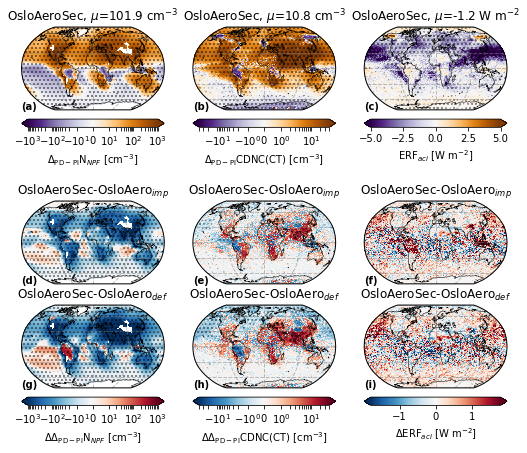

In [37]:
vl = ['NCONC01', 'ACTNL_incld', 'NCFT_Ghan']
fig, axs_dic = abs_diffs(di_dic,
                         vl,
                         norm_abs=norm_abs,
                         norm_dic=norm_dic,
                         invert_diff=True,

                         )

dic_means_yr = yearly_mean_dic(vl + ['ACTNL'], cases, startyear, endyear, pmin, pressure_adjust,
                               avg_over_lev=avg_over_lev, groupby=None, dims=('lev',), area='Global')

for var in vl:
    for case_oth in cases_oth:
        ax = axs_dic[var][case_oth]

        add_significance_diff_diff(ax, dic_means_yr, var, case_oth, ctrl='OsloAeroSec', case_types=None)
    ax = axs_dic[var][ctrl]
    add_significance_diff(ax, dic_means_yr, var, ctrl='OsloAeroSec', case_types=None)
clear_output()
fn = filen_base + 'aer_cld_frc.pdf'
fig.savefig(fn, dpi=300)
plt.show()

In [38]:
print(fn)

/home/ubuntu/mnts/nird/projects//Plots_SECT_SENS/maps//pi_pd_diffaer_cld_frc.pdf


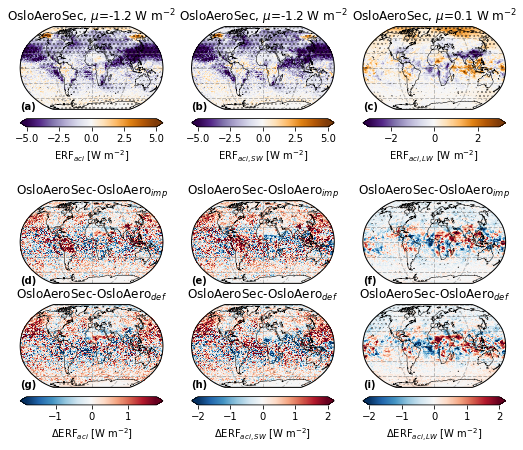

In [39]:
vl = ['NCFT_Ghan', 'SWCF_Ghan', 'LWCF_Ghan']  # ['NCONC01', 'ACTNL_incld', 'NCFT_Ghan']
fig, axs_dic = abs_diffs(di_dic,
                         vl,
                         norm_abs=norm_abs,
                         norm_dic=norm_dic,
                         invert_diff=True,

                         )

dic_means_yr = yearly_mean_dic(vl, cases, startyear, endyear, pmin, pressure_adjust,
                               avg_over_lev=avg_over_lev, groupby=None, dims=('lev',), area='Global')

for var in vl:
    for case_oth in cases_oth:
        ax = axs_dic[var][case_oth]

        add_significance_diff_diff(ax, dic_means_yr, var, case_oth, ctrl='OsloAeroSec', case_types=None)
    ax = axs_dic[var][ctrl]
    add_significance_diff(ax, dic_means_yr, var, ctrl='OsloAeroSec', case_types=None)
clear_output()
fp = filen_base + 'ERF_aci_SWLW.pdf'
fig.savefig(fp, dpi=300)

plt.show()

In [40]:
print(fp)

/home/ubuntu/mnts/nird/projects//Plots_SECT_SENS/maps//pi_pd_diffERF_aci_SWLW.pdf
